# Perceptron



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
from MultiLayerPerceptron import MultiLayerPerceptron

# Important Functions

In [3]:
def plot_loss(epoch_his, train_loss_his, test_loss_his):
    train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Loss')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

In [4]:
def plot_accuracy(epoch_his, train_acc_his, test_acc_his):
    train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

# Perceptron Network

In [ ]:
# Testing the Neural Network for predicting XOR function

In [ ]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])

In [ ]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])

In [ ]:
# testing the model outputs
pred , _ = model.forward(X_train)
# print(np.sum((pred > 0.5)== Y_train) / Y_train.shape[0])
# accuracy(model , X_train,Y_train)
# X_train[0]

In [ ]:
# Checking for testing purposes(BCE should be used here ideally)
from Loss import mean_abs_error,mean_square_error
loss,d_back = mean_square_error(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

In [ ]:
from Loss import binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

In [ ]:
# Now we can train the model by iteratively on each datapoint.

layer_list = [2,3,1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)


_=model.train(X_train,
            Y_train,
            X_train,
            Y_train,
            metric ='accuracy_binary',
            loss_function_string='binary_cross_entropy',
            epochs=1000,
            record_at=100)

In [ ]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
model.metric_function(X_train,Y_train,metric='accuracy_binary')

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.But we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [ ]:
n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp

In [ ]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

In [ ]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]

X_test = X[train_n:]
Y_test = Y[train_n:]
Y_test.shape

In [ ]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','sigmoid','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

In [ ]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_binary',
                                                                                loss_function_string='binary_cross_entropy',
                                                                                epochs = 200,
                                                                                record_at = 10,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

In [ ]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# Simple Multiclass classification dataset

In [ ]:
xcoords1 = [1,1,1,1,1]
xcoords2 = [2,2,2,2,2]
xcoords3 = [3,3,3,3,3]
ycoords = [1,2,3,4,5]
plt.plot(xcoords1, ycoords, label='class 1',marker='o')
plt.plot(xcoords2, ycoords, label='class 2',marker='s')
plt.plot(xcoords3, ycoords, label='class 3',marker='D')
plt.legend(loc='best')
plt.show()

In [ ]:
#Making the dataset
dataset = [[i,j] for i in range(1,6) for j in range(1,4)]
labels = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]

In [ ]:
div = 0.8
N = len(dataset)
X_train = np.array(dataset[:int(div*N)])
Y_train = np.array(labels[:int(div*N)])
X_test = np.array(dataset[int(div*N):])
Y_test = np.array(labels[int(div*N):])

In [ ]:
layer_list = [2,6,5,3]#,8,8,8,6,3]
activation_list = ['sigmoid','sigmoid','softmax']#,'relu','relu','relu','relu']
model = MultiLayerPerceptron(layer_list,activation_list)

In [ ]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 1000,
                                                                                record_at = 10,
                                                                                learning_rate= 0.01,
                                                                                learning_rate_decay=False)

In [ ]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# gene expression cancer RNA-Seq Data Set
From UCI Machine Learning Dataset Repository  
By Samuele Fiorini, University of Genoa  
Link : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

In [ ]:
dataset = pd.read_csv('Data/PANCANCER/data.csv')
labels = pd.read_csv('./Data/PANCANCER/labels.csv')

In [ ]:
dataset.head()

In [ ]:
labels.head()

In [ ]:
# Deleting label and dataset indexes
dataset = dataset.drop(columns=['Unnamed: 0'],axis=1)
labels = labels.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
# Converting labels to one hot encoding
labels = pd.get_dummies(labels)

In [ ]:
# Converting dataset and labels to numpy array
dataset = dataset.values
labels = labels.values

In [ ]:
div = 0.8
N = len(dataset)
X_train = dataset[:int(div*N)]
Y_train = labels[:int(div*N)]
X_test = dataset[int(div*N):]
Y_test = labels[int(div*N):]

In [ ]:
X_train

In [ ]:
#Normalising
X_train = (X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
X_test = (X_test-np.mean(X_train,axis=0))/np.std(X_train,axis=0)

In [ ]:
X_train

In [ ]:
layer_list = [20531,5]#,45,45,45,45,5]
activation_list = ['softmax'] #['relu','relu','relu','sigmoid','softmax']
model = MultiLayerPerceptron(layer_list,activation_list)

In [ ]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 200,
                                                                                record_at = 5,
                                                                                learning_rate= 0.0001,
                                                                                learning_rate_decay=False)

In [ ]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# Breast Cancer Wisconsin (Diagnostic) Data Set
From UCI Machine Learning Dataset Repository
By Creators:

1. Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Donor:

Nick Street

Link : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

### Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32.

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

In [5]:
df = pd.read_csv('./Data/wdbc.txt',header = None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Dropping indexes
df = df.drop(0,axis=1)

In [8]:
#Splitting into training and testing data
df = df.sample(frac = 1.0).reset_index(drop = True)
labels = df[1]
df = df.drop(1 , axis =1)

labels = pd.get_dummies(labels)#['M']


div = 0.8
N = len(df)
X_train = df[:int(div*N)].values
Y_train = labels[:int(div*N)].values
X_test = df[int(div*N):].values
Y_test = labels[int(div*N):].values

In [38]:
layer_list = [30,45,45,45,45,2]
activation_list = ['sigmoid','sigmoid','sigmoid','sigmoid','softmax']
model = MultiLayerPerceptron(layer_list,activation_list)

(30, 45) (45,)
<function sigmoid at 0x7f75106116a8>
(45, 45) (45,)
<function sigmoid at 0x7f75106116a8>
(45, 45) (45,)
<function sigmoid at 0x7f75106116a8>
(45, 45) (45,)
<function sigmoid at 0x7f75106116a8>
(45, 2) (2,)
<function softmax at 0x7f7510611d08>


In [39]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 20000,
                                                                                record_at = 20,
                                                                                learning_rate= 0.00000001,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:1.1580192817647184|Training Accuracy:0.6285714285714286|Test Loss:1.116492870595849|Test Accuracy:0.6228070175438597
20th EPOCH:
Training Loss:1.0640025422432373|Training Accuracy:0.6285714285714286|Test Loss:1.0281357517178245|Test Accuracy:0.6228070175438597
40th EPOCH:
Training Loss:0.9810108356186281|Training Accuracy:0.6285714285714286|Test Loss:0.9509835545727995|Test Accuracy:0.6228070175438597
60th EPOCH:
Training Loss:0.909063151018785|Training Accuracy:0.6285714285714286|Test Loss:0.8849065268315475|Test Accuracy:0.6228070175438597
80th EPOCH:
Training Loss:0.8477074071454301|Training Accuracy:0.6285714285714286|Test Loss:0.8292175386420368|Test Accuracy:0.6228070175438597
100th EPOCH:
Training Loss:0.7962284416908787|Training Accuracy:0.6285714285714286|Test Loss:0.7829634713221281|Test Accuracy:0.6228070175438597
120th EPOCH:
Training Loss:0.7536808427140532|Training Accuracy:0.6285714285714286|Test Loss:0.7450288062979852|Test Accuracy:0.6228070175

1160th EPOCH:
Training Loss:0.5146346083727616|Training Accuracy:0.832967032967033|Test Loss:0.542369689874768|Test Accuracy:0.7894736842105263
1180th EPOCH:
Training Loss:0.5137772341720713|Training Accuracy:0.832967032967033|Test Loss:0.5418125701080757|Test Accuracy:0.7894736842105263
1200th EPOCH:
Training Loss:0.512936492889615|Training Accuracy:0.832967032967033|Test Loss:0.5412591943844222|Test Accuracy:0.7894736842105263
1220th EPOCH:
Training Loss:0.512111858204949|Training Accuracy:0.832967032967033|Test Loss:0.5407095395299022|Test Accuracy:0.7894736842105263
1240th EPOCH:
Training Loss:0.5113027633604702|Training Accuracy:0.832967032967033|Test Loss:0.5401637053642435|Test Accuracy:0.7894736842105263
1260th EPOCH:
Training Loss:0.5105085974164576|Training Accuracy:0.832967032967033|Test Loss:0.5396218460948619|Test Accuracy:0.7894736842105263
1280th EPOCH:
Training Loss:0.5097287052717122|Training Accuracy:0.832967032967033|Test Loss:0.5390841171905884|Test Accuracy:0.78947

2340th EPOCH:
Training Loss:0.47974403775046753|Training Accuracy:0.8351648351648352|Test Loss:0.5136755460512256|Test Accuracy:0.7982456140350878
2360th EPOCH:
Training Loss:0.47929718083766526|Training Accuracy:0.8417582417582418|Test Loss:0.5132806314399576|Test Accuracy:0.8070175438596491
2380th EPOCH:
Training Loss:0.47884970445236413|Training Accuracy:0.8417582417582418|Test Loss:0.5128890750978453|Test Accuracy:0.8070175438596491
2400th EPOCH:
Training Loss:0.47840138019570144|Training Accuracy:0.8417582417582418|Test Loss:0.5125007798953777|Test Accuracy:0.8070175438596491
2420th EPOCH:
Training Loss:0.47795198813779816|Training Accuracy:0.8417582417582418|Test Loss:0.5121156369479578|Test Accuracy:0.8070175438596491
2440th EPOCH:
Training Loss:0.4775013154554216|Training Accuracy:0.8417582417582418|Test Loss:0.5117335211888403|Test Accuracy:0.8070175438596491
2460th EPOCH:
Training Loss:0.4770491548167131|Training Accuracy:0.8417582417582418|Test Loss:0.5113542871262333|Test A

3500th EPOCH:
Training Loss:0.45277301779904117|Training Accuracy:0.8461538461538461|Test Loss:0.4911097946726227|Test Accuracy:0.8157894736842105
3520th EPOCH:
Training Loss:0.4523161524819796|Training Accuracy:0.8417582417582418|Test Loss:0.4907758930403755|Test Accuracy:0.8157894736842105
3540th EPOCH:
Training Loss:0.4518487607040566|Training Accuracy:0.8417582417582418|Test Loss:0.49045125510765114|Test Accuracy:0.8157894736842105
3560th EPOCH:
Training Loss:0.45136942483532627|Training Accuracy:0.8461538461538461|Test Loss:0.49013657189284426|Test Accuracy:0.8157894736842105
3580th EPOCH:
Training Loss:0.45087692501262877|Training Accuracy:0.8461538461538461|Test Loss:0.48983238616572067|Test Accuracy:0.8157894736842105
3600th EPOCH:
Training Loss:0.45037036606041464|Training Accuracy:0.8461538461538461|Test Loss:0.4895389970076825|Test Accuracy:0.8157894736842105
3620th EPOCH:
Training Loss:0.44984929231522836|Training Accuracy:0.8461538461538461|Test Loss:0.4892563735712284|Tes

4620th EPOCH:
Training Loss:0.42153447302439656|Training Accuracy:0.865934065934066|Test Loss:0.4780523839917081|Test Accuracy:0.7807017543859649
4640th EPOCH:
Training Loss:0.4211186712495868|Training Accuracy:0.865934065934066|Test Loss:0.47787699906545245|Test Accuracy:0.7807017543859649
4660th EPOCH:
Training Loss:0.42071537558830335|Training Accuracy:0.865934065934066|Test Loss:0.4777073261319047|Test Accuracy:0.7807017543859649
4680th EPOCH:
Training Loss:0.42032383717519267|Training Accuracy:0.865934065934066|Test Loss:0.4775433790598145|Test Accuracy:0.7807017543859649
4700th EPOCH:
Training Loss:0.4199433433907211|Training Accuracy:0.865934065934066|Test Loss:0.4773851374230008|Test Accuracy:0.7807017543859649
4720th EPOCH:
Training Loss:0.4195732226407411|Training Accuracy:0.865934065934066|Test Loss:0.4772325512577499|Test Accuracy:0.7807017543859649
4740th EPOCH:
Training Loss:0.4192128412670858|Training Accuracy:0.865934065934066|Test Loss:0.4770855469552418|Test Accuracy:

5800th EPOCH:
Training Loss:0.4058313675466388|Training Accuracy:0.8637362637362638|Test Loss:0.47405317723508694|Test Accuracy:0.7807017543859649
5820th EPOCH:
Training Loss:0.40562834387385427|Training Accuracy:0.8637362637362638|Test Loss:0.47402852864793593|Test Accuracy:0.7807017543859649
5840th EPOCH:
Training Loss:0.4054263807640357|Training Accuracy:0.8637362637362638|Test Loss:0.47400352854801164|Test Accuracy:0.7807017543859649
5860th EPOCH:
Training Loss:0.40522544378684516|Training Accuracy:0.8637362637362638|Test Loss:0.4739781302368928|Test Accuracy:0.7807017543859649
5880th EPOCH:
Training Loss:0.4050254973717466|Training Accuracy:0.8637362637362638|Test Loss:0.47395228892816615|Test Accuracy:0.7807017543859649
5900th EPOCH:
Training Loss:0.4048265047363864|Training Accuracy:0.8637362637362638|Test Loss:0.47392596150116284|Test Accuracy:0.7807017543859649
5920th EPOCH:
Training Loss:0.4046284278016122|Training Accuracy:0.8637362637362638|Test Loss:0.4738991062178733|Test

6940th EPOCH:
Training Loss:0.39339296137829666|Training Accuracy:0.8637362637362638|Test Loss:0.46695336770682866|Test Accuracy:0.7894736842105263
6960th EPOCH:
Training Loss:0.3930935016075212|Training Accuracy:0.8637362637362638|Test Loss:0.46648407683185517|Test Accuracy:0.7894736842105263
6980th EPOCH:
Training Loss:0.39279485016198656|Training Accuracy:0.8637362637362638|Test Loss:0.4659985033603361|Test Accuracy:0.7894736842105263
7000th EPOCH:
Training Loss:0.39249778257146134|Training Accuracy:0.8637362637362638|Test Loss:0.4654975281085554|Test Accuracy:0.7894736842105263
7020th EPOCH:
Training Loss:0.392203015764389|Training Accuracy:0.8637362637362638|Test Loss:0.4649821597423769|Test Accuracy:0.7894736842105263
7040th EPOCH:
Training Loss:0.3919112028430188|Training Accuracy:0.8637362637362638|Test Loss:0.46445357950773725|Test Accuracy:0.7894736842105263
7060th EPOCH:
Training Loss:0.3916229294119828|Training Accuracy:0.8637362637362638|Test Loss:0.463913175087098|Test Ac

8140th EPOCH:
Training Loss:0.3810277174684132|Training Accuracy:0.8461538461538461|Test Loss:0.4414932532353003|Test Accuracy:0.8070175438596491
8160th EPOCH:
Training Loss:0.3808367286578322|Training Accuracy:0.8461538461538461|Test Loss:0.44121182866690595|Test Accuracy:0.8070175438596491
8180th EPOCH:
Training Loss:0.38063962224604875|Training Accuracy:0.8461538461538461|Test Loss:0.4409316874623277|Test Accuracy:0.8070175438596491
8200th EPOCH:
Training Loss:0.38043556383572663|Training Accuracy:0.8461538461538461|Test Loss:0.44065288614142306|Test Accuracy:0.8070175438596491
8220th EPOCH:
Training Loss:0.3802236703966189|Training Accuracy:0.8461538461538461|Test Loss:0.44037555634319847|Test Accuracy:0.8070175438596491
8240th EPOCH:
Training Loss:0.3800030294946454|Training Accuracy:0.8461538461538461|Test Loss:0.44009991695416373|Test Accuracy:0.8070175438596491
8260th EPOCH:
Training Loss:0.37977272931095735|Training Accuracy:0.8461538461538461|Test Loss:0.4398262856621436|Test

9280th EPOCH:
Training Loss:0.36483005296684784|Training Accuracy:0.8703296703296703|Test Loss:0.4388599324372409|Test Accuracy:0.7982456140350878
9300th EPOCH:
Training Loss:0.3644465716581711|Training Accuracy:0.8703296703296703|Test Loss:0.43880491686931117|Test Accuracy:0.7982456140350878
9320th EPOCH:
Training Loss:0.3640305152771597|Training Accuracy:0.8703296703296703|Test Loss:0.43870611036163715|Test Accuracy:0.7982456140350878
9340th EPOCH:
Training Loss:0.3635734153949604|Training Accuracy:0.8725274725274725|Test Loss:0.43856085398747063|Test Accuracy:0.7982456140350878
9360th EPOCH:
Training Loss:0.3630665225051055|Training Accuracy:0.8725274725274725|Test Loss:0.43836645677052555|Test Accuracy:0.7982456140350878
9380th EPOCH:
Training Loss:0.3625026912330822|Training Accuracy:0.8725274725274725|Test Loss:0.43812123109784384|Test Accuracy:0.7982456140350878
9400th EPOCH:
Training Loss:0.36187973024677966|Training Accuracy:0.8703296703296703|Test Loss:0.4378262240091482|Test

10400th EPOCH:
Training Loss:0.35240205623223697|Training Accuracy:0.8769230769230769|Test Loss:0.4273559682361819|Test Accuracy:0.7982456140350878
10420th EPOCH:
Training Loss:0.35233766378473746|Training Accuracy:0.8769230769230769|Test Loss:0.427213222624324|Test Accuracy:0.7982456140350878
10440th EPOCH:
Training Loss:0.3522727678980114|Training Accuracy:0.8769230769230769|Test Loss:0.42707123670627384|Test Accuracy:0.7982456140350878
10460th EPOCH:
Training Loss:0.352207379635314|Training Accuracy:0.8769230769230769|Test Loss:0.4269299874762084|Test Accuracy:0.7982456140350878
10480th EPOCH:
Training Loss:0.35214151383766096|Training Accuracy:0.8769230769230769|Test Loss:0.42678945566500326|Test Accuracy:0.7982456140350878
10500th EPOCH:
Training Loss:0.35207518831004897|Training Accuracy:0.8769230769230769|Test Loss:0.42664962522257255|Test Accuracy:0.7982456140350878
10520th EPOCH:
Training Loss:0.3520084231330472|Training Accuracy:0.8769230769230769|Test Loss:0.4265104828559895

11520th EPOCH:
Training Loss:0.3485281789659399|Training Accuracy:0.8769230769230769|Test Loss:0.4203459705681212|Test Accuracy:0.7982456140350878
11540th EPOCH:
Training Loss:0.34846071140297824|Training Accuracy:0.8769230769230769|Test Loss:0.42023693472593665|Test Accuracy:0.7982456140350878
11560th EPOCH:
Training Loss:0.3483934089917668|Training Accuracy:0.8769230769230769|Test Loss:0.4201283603125993|Test Accuracy:0.7982456140350878
11580th EPOCH:
Training Loss:0.34832627236822333|Training Accuracy:0.8769230769230769|Test Loss:0.4200202395895828|Test Accuracy:0.7982456140350878
11600th EPOCH:
Training Loss:0.348259302010155|Training Accuracy:0.8769230769230769|Test Loss:0.419912564664009|Test Accuracy:0.7982456140350878
11620th EPOCH:
Training Loss:0.3481924982440399|Training Accuracy:0.8769230769230769|Test Loss:0.41980532748502947|Test Accuracy:0.7982456140350878
11640th EPOCH:
Training Loss:0.348125861250994|Training Accuracy:0.8769230769230769|Test Loss:0.41969851983949846|Te

12680th EPOCH:
Training Loss:0.3448294422856641|Training Accuracy:0.8791208791208791|Test Loss:0.41442971169451176|Test Accuracy:0.7982456140350878
12700th EPOCH:
Training Loss:0.3447664381556845|Training Accuracy:0.8791208791208791|Test Loss:0.41432498685499153|Test Accuracy:0.7982456140350878
12720th EPOCH:
Training Loss:0.3447033943811033|Training Accuracy:0.8791208791208791|Test Loss:0.4142197438284249|Test Accuracy:0.7982456140350878
12740th EPOCH:
Training Loss:0.34464033913263215|Training Accuracy:0.8791208791208791|Test Loss:0.414113980521991|Test Accuracy:0.7982456140350878
12760th EPOCH:
Training Loss:0.3445773058308069|Training Accuracy:0.8791208791208791|Test Loss:0.41400770053016944|Test Accuracy:0.7982456140350878
12780th EPOCH:
Training Loss:0.34451433272387044|Training Accuracy:0.8791208791208791|Test Loss:0.4139009135875237|Test Accuracy:0.7982456140350878
12800th EPOCH:
Training Loss:0.3444514622167864|Training Accuracy:0.8791208791208791|Test Loss:0.4137936359120615|

13880th EPOCH:
Training Loss:0.3413935220789573|Training Accuracy:0.8791208791208791|Test Loss:0.408248911200758|Test Accuracy:0.7982456140350878
13900th EPOCH:
Training Loss:0.3413354693179377|Training Accuracy:0.8791208791208791|Test Loss:0.4081558825007118|Test Accuracy:0.7982456140350878
13920th EPOCH:
Training Loss:0.34127721948810613|Training Accuracy:0.8791208791208791|Test Loss:0.4080630564439196|Test Accuracy:0.7982456140350878
13940th EPOCH:
Training Loss:0.34121877438897097|Training Accuracy:0.8791208791208791|Test Loss:0.4079704237407027|Test Accuracy:0.7982456140350878
13960th EPOCH:
Training Loss:0.3411601359121519|Training Accuracy:0.8791208791208791|Test Loss:0.4078779753471235|Test Accuracy:0.7982456140350878
13980th EPOCH:
Training Loss:0.3411013060163186|Training Accuracy:0.8791208791208791|Test Loss:0.4077857024535603|Test Accuracy:0.7982456140350878
14000th EPOCH:
Training Loss:0.34104228670511477|Training Accuracy:0.8791208791208791|Test Loss:0.4076935964734453|Te

15000th EPOCH:
Training Loss:0.3378828197444088|Training Accuracy:0.8769230769230769|Test Loss:0.4031516659332231|Test Accuracy:0.7982456140350878
15020th EPOCH:
Training Loss:0.3378158310430534|Training Accuracy:0.8769230769230769|Test Loss:0.4030595879899095|Test Accuracy:0.7982456140350878
15040th EPOCH:
Training Loss:0.3377487005468183|Training Accuracy:0.8769230769230769|Test Loss:0.4029673734161263|Test Accuracy:0.7982456140350878
15060th EPOCH:
Training Loss:0.3376814285715407|Training Accuracy:0.8769230769230769|Test Loss:0.40287501731312353|Test Accuracy:0.7982456140350878
15080th EPOCH:
Training Loss:0.33761401544804426|Training Accuracy:0.8769230769230769|Test Loss:0.4027825147617989|Test Accuracy:0.7982456140350878
15100th EPOCH:
Training Loss:0.33754646152379775|Training Accuracy:0.8769230769230769|Test Loss:0.40268986081852254|Test Accuracy:0.7982456140350878
15120th EPOCH:
Training Loss:0.3374787671645191|Training Accuracy:0.8769230769230769|Test Loss:0.40259705051076794

16160th EPOCH:
Training Loss:0.3337840993157169|Training Accuracy:0.8769230769230769|Test Loss:0.3973903151653073|Test Accuracy:0.7982456140350878
16180th EPOCH:
Training Loss:0.33371020831181186|Training Accuracy:0.8769230769230769|Test Loss:0.39727772419630614|Test Accuracy:0.7982456140350878
16200th EPOCH:
Training Loss:0.33363622336019866|Training Accuracy:0.8769230769230769|Test Loss:0.39716431479486547|Test Accuracy:0.7982456140350878
16220th EPOCH:
Training Loss:0.33356214266887785|Training Accuracy:0.8769230769230769|Test Loss:0.39705005145879607|Test Accuracy:0.7982456140350878
16240th EPOCH:
Training Loss:0.33348796384449814|Training Accuracy:0.8769230769230769|Test Loss:0.3969348966555265|Test Accuracy:0.7982456140350878
16260th EPOCH:
Training Loss:0.3334136838045868|Training Accuracy:0.8769230769230769|Test Loss:0.3968188107240044|Test Accuracy:0.7982456140350878
16280th EPOCH:
Training Loss:0.3333392986793726|Training Accuracy:0.8769230769230769|Test Loss:0.39670175177932

17340th EPOCH:
Training Loss:0.328724448233165|Training Accuracy:0.8813186813186813|Test Loss:0.3880340692223292|Test Accuracy:0.7982456140350878
17360th EPOCH:
Training Loss:0.32864571531691394|Training Accuracy:0.8813186813186813|Test Loss:0.3878761926060037|Test Accuracy:0.7982456140350878
17380th EPOCH:
Training Loss:0.3285714896804118|Training Accuracy:0.8835164835164835|Test Loss:0.387724700719735|Test Accuracy:0.7982456140350878
17400th EPOCH:
Training Loss:0.3285014285282857|Training Accuracy:0.8835164835164835|Test Loss:0.38757912787321597|Test Accuracy:0.7982456140350878
17420th EPOCH:
Training Loss:0.3284351002445173|Training Accuracy:0.8835164835164835|Test Loss:0.38743894314236055|Test Accuracy:0.7982456140350878
17440th EPOCH:
Training Loss:0.32837202971194074|Training Accuracy:0.8835164835164835|Test Loss:0.38730359269764836|Test Accuracy:0.7982456140350878
17460th EPOCH:
Training Loss:0.328311734172929|Training Accuracy:0.8835164835164835|Test Loss:0.38717253097612414|T

18500th EPOCH:
Training Loss:0.32525417053200095|Training Accuracy:0.8791208791208791|Test Loss:0.3817416392038063|Test Accuracy:0.7982456140350878
18520th EPOCH:
Training Loss:0.32518800231985556|Training Accuracy:0.8791208791208791|Test Loss:0.38164470651850035|Test Accuracy:0.7982456140350878
18540th EPOCH:
Training Loss:0.32512174323951726|Training Accuracy:0.8791208791208791|Test Loss:0.38154797748593633|Test Accuracy:0.7982456140350878
18560th EPOCH:
Training Loss:0.32505540434027713|Training Accuracy:0.8791208791208791|Test Loss:0.3814514529959306|Test Accuracy:0.7982456140350878
18580th EPOCH:
Training Loss:0.3249889963913721|Training Accuracy:0.8791208791208791|Test Loss:0.38135513392943016|Test Accuracy:0.7982456140350878
18600th EPOCH:
Training Loss:0.3249225298848343|Training Accuracy:0.8791208791208791|Test Loss:0.38125902115788335|Test Accuracy:0.7982456140350878
18620th EPOCH:
Training Loss:0.3248560150386514|Training Accuracy:0.8791208791208791|Test Loss:0.3811631155428

19640th EPOCH:
Training Loss:0.32156667016107987|Training Accuracy:0.8791208791208791|Test Loss:0.3765630881277623|Test Accuracy:0.8508771929824561
19660th EPOCH:
Training Loss:0.32150633176820176|Training Accuracy:0.8791208791208791|Test Loss:0.37647883768736395|Test Accuracy:0.8508771929824561
19680th EPOCH:
Training Loss:0.32144620206964397|Training Accuracy:0.8791208791208791|Test Loss:0.3763948213639385|Test Accuracy:0.8508771929824561
19700th EPOCH:
Training Loss:0.3213862824132203|Training Accuracy:0.8791208791208791|Test Loss:0.3763110392496191|Test Accuracy:0.8508771929824561
19720th EPOCH:
Training Loss:0.3213265740719976|Training Accuracy:0.8791208791208791|Test Loss:0.37622749142193024|Test Accuracy:0.8508771929824561
19740th EPOCH:
Training Loss:0.3212670782464318|Training Accuracy:0.8791208791208791|Test Loss:0.3761441779440299|Test Accuracy:0.8508771929824561
19760th EPOCH:
Training Loss:0.32120779606645233|Training Accuracy:0.8791208791208791|Test Loss:0.376061098864956

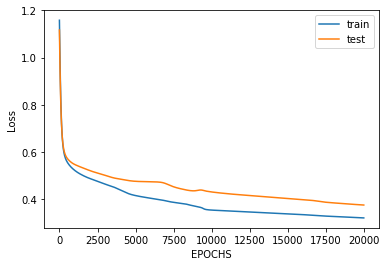

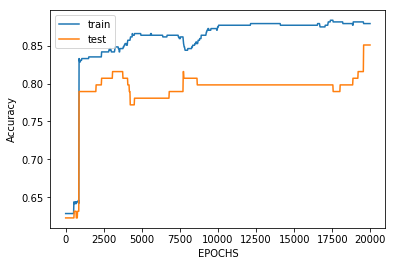

In [40]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)